In [2]:
import tensorflow as tf
print(tf.__version__)

2.9.2


In [3]:
import matplotlib.pyplot as plt
import numpy as np

# **Loading of smiley dataset**

In [4]:
X = np.load('smiley_X.npy')

In [5]:
Y = np.load('smiley_y.npy')

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.4, random_state = 100)

In [8]:
class_names = ["1","0"]

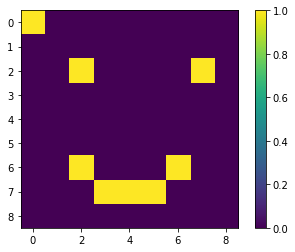

In [32]:
import matplotlib.pyplot as plt
plt.figure()
plt.imshow(np.squeeze(X_train[0]))
plt.colorbar()
plt.grid(False)
plt.show()


In [14]:
print(Y_train[0])

0.0


In [15]:
print(X_train[0])

[[[1.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]]

 [[0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]]

 [[0.]
  [0.]
  [1.]
  [0.]
  [0.]
  [0.]
  [0.]
  [1.]
  [0.]]

 [[0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]]

 [[0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]]

 [[0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]]

 [[0.]
  [0.]
  [1.]
  [0.]
  [0.]
  [0.]
  [1.]
  [0.]
  [0.]]

 [[0.]
  [0.]
  [0.]
  [1.]
  [1.]
  [1.]
  [0.]
  [0.]
  [0.]]

 [[0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]]]


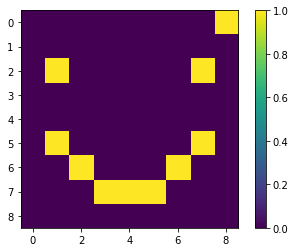

In [17]:
plt.imshow(np.squeeze(X_train[1]))
plt.colorbar()
plt.grid(False)

In [18]:
print(X_train[2])

[[[0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]]

 [[0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]]

 [[0.]
  [0.]
  [1.]
  [0.]
  [0.]
  [0.]
  [1.]
  [0.]
  [0.]]

 [[0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]]

 [[0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]]

 [[0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]]

 [[0.]
  [0.]
  [1.]
  [0.]
  [0.]
  [0.]
  [1.]
  [0.]
  [0.]]

 [[0.]
  [0.]
  [0.]
  [1.]
  [1.]
  [1.]
  [0.]
  [0.]
  [0.]]

 [[0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]]]


# **Normalization of smiley data**

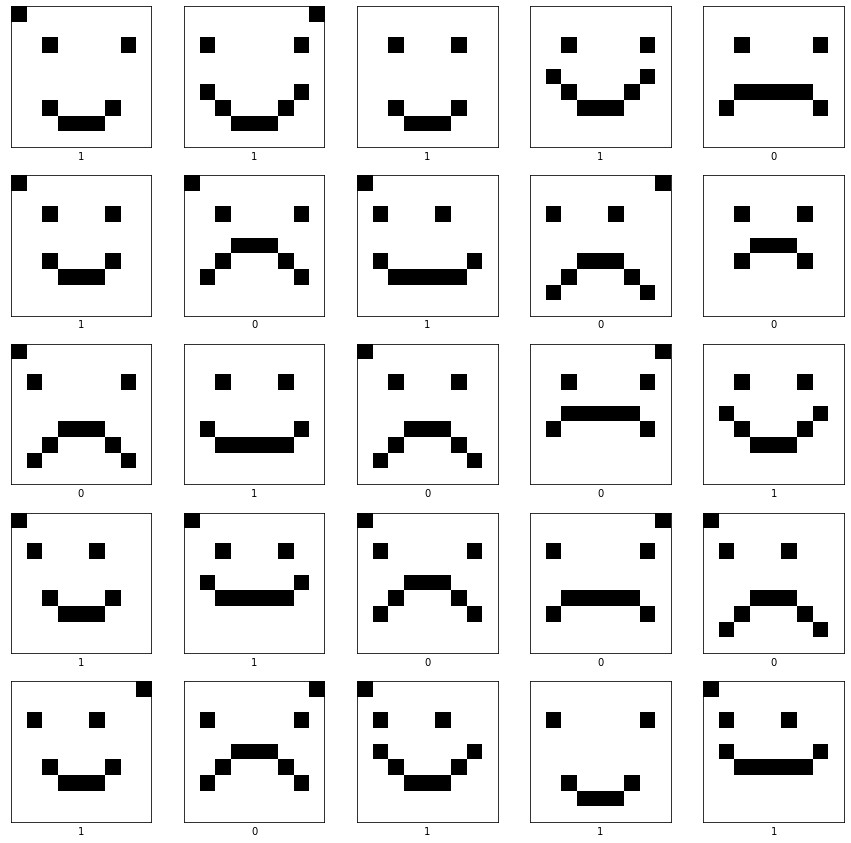

In [20]:
plt.figure(figsize=(15,15))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(np.squeeze(X_train[i]), cmap=plt.cm.binary)
    plt.xlabel(class_names[int(Y_train[i])])
plt.show()

# ANN Model Building

In [21]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(9,9,1)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

In [22]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [23]:
model.fit(x=X_train,y=Y_train,epochs=10)

Epoch 1/10
3/3 [==============================] - 1s 6ms/step - loss: 2.2540 - accuracy: 0.0581
Epoch 2/10
3/3 [==============================] - 0s 8ms/step - loss: 2.0608 - accuracy: 0.3140
Epoch 3/10
3/3 [==============================] - 0s 6ms/step - loss: 1.8785 - accuracy: 0.6512
Epoch 4/10
3/3 [==============================] - 0s 6ms/step - loss: 1.7022 - accuracy: 0.8488
Epoch 5/10
3/3 [==============================] - 0s 5ms/step - loss: 1.5340 - accuracy: 0.9419
Epoch 6/10
3/3 [==============================] - 0s 5ms/step - loss: 1.3713 - accuracy: 0.9535
Epoch 7/10
3/3 [==============================] - 0s 7ms/step - loss: 1.2170 - accuracy: 0.9651
Epoch 8/10
3/3 [==============================] - 0s 5ms/step - loss: 1.0688 - accuracy: 0.9651
Epoch 9/10
3/3 [==============================] - 0s 6ms/step - loss: 0.9300 - accuracy: 0.9651
Epoch 10/10
3/3 [==============================] - 0s 5ms/step - loss: 0.8025 - accuracy: 0.9767


**Evaluation**

In [24]:
test_loss, test_acc = model.evaluate(X_test,  Y_test, verbose=0)
print('\nTest accuracy:', test_acc)


Test accuracy: 0.982758641242981


**Prediction**

In [25]:
classifications = model.predict(X_test)

2/2 [==============================] - 0s 8ms/step


In [26]:
print(classifications[3])


[0.1966894  0.5154217  0.06440091 0.02467724 0.02913281 0.03871002
 0.0293753  0.0366874  0.02261808 0.04228706]


In [27]:
np.argmax(classifications[3])

1

In [28]:
np.max(classifications[3])

0.5154217

In [29]:
class_names[np.argmax(classifications[3])]

'0'

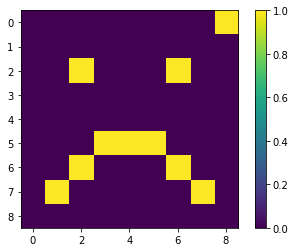

In [31]:
plt.imshow(np.squeeze(X_test[3]))
plt.colorbar()
plt.grid(False)

In [33]:
def plot_value_array(i, predictions_array, true_label):
    
    predictions_array, true_label = predictions_array, true_label[i]
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)
    thisplot[predicted_label].set_color('red')
    thisplot[int(true_label)].set_color('blue')

In [34]:
def plot_image(i, predictions_array, true_label, img):
    
    predictions_array, true_label, img = predictions_array, true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(img, cmap=plt.cm.binary)
    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[int(true_label)]),
                                color=color)


TypeError: ignored

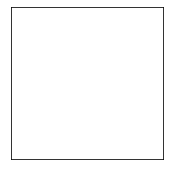

In [41]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, classifications[i], Y_test, X_test)
plt.subplot(1,2,2)
plot_value_array(i, classifications[i],  Y_test)
plt.show()